In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
fintech_df = pd.read_csv("./data/핀테크뉴스수집.csv")
fintech_df.head()

,날짜,일자제목,뉴스제목,본문
0,2025-11-21,[11/21 핀테크 주요뉴스],[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,모집 2025 핀테크 전문가 과정 FinBoost Academy 모듈 4 5 6 참...
1,2025-11-21,[11/21 핀테크 주요뉴스],[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...
2,2025-11-21,[11/21 핀테크 주요뉴스],[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,모집 온라인 과정 핀테크를 통한 금융 AI 트렌드와 혁신 사례 12 31 상시모집 ...
3,2025-11-21,[11/21 핀테크 주요뉴스],[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기...
4,2025-11-21,[11/21 핀테크 주요뉴스],"금감원, IMA·발행어음 증권사 임원 대상 간담회 개최… 모험자본·리스크·소비자보호 당부",연합뉴스 금융감독원이 한국투자증권 미래에셋증권 키움증권의 종합투자계좌 IMA 발행어...


In [4]:
fintech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12187 entries, 0 to 12186
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      12187 non-null  object
 1   일자제목    12187 non-null  object
 2   뉴스제목    12187 non-null  object
 3   본문      12187 non-null  object
dtypes: object(4)
memory usage: 381.0+ KB


In [5]:
fintech_df = fintech_df.drop("일자제목", axis=1)

In [6]:
import re

In [16]:
df = fintech_df[fintech_df["본문"].notna()]

In [8]:
def text_clean(x):
    # 한글, 영문대소문자, 숫자만 남기고 모두 제거
    cleaned = re.sub(r'[^가-힣a-zA-Z0-9]', " ", x)
    cleaned = cleaned.replace("  ", " ").replace("  ", " ").strip()
    return cleaned

In [9]:
fintech_df["clean"] = fintech_df["본문"].apply(text_clean)

In [13]:
def simple_tokenize(text):
    words = re.findall(r"[가-힣]{2,}",text)
    return words

In [17]:
df["tokens"] = fintech_df["clean"].apply(simple_tokenize)

In [19]:
df.head()

,날짜,뉴스제목,본문,clean,tokens
0,2025-11-21,[한국핀테크지원센터] 2025 핀테크 전문가(개발자) 과정 ‘FinBoost Aca...,모집 2025 핀테크 전문가 과정 FinBoost Academy 모듈 4 5 6 참...,모집 2025 핀테크 전문가 과정 FinBoost Academy 모듈 4 5 6 참...,"[모집, 핀테크, 전문가, 과정, 모듈, 참여신청서, 접수, 작성일, 조회수, 홍보..."
1,2025-11-21,[한국핀테크산업협회] 네트워킹 행사 '핀테크 커넥팅 데이 2025' 개최(11.26...,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,한국핀테크산업협회 네트워킹 행사 핀테크 커넥팅 데이 2025 개최 11 26 신청 ...,"[한국핀테크산업협회, 네트워킹, 행사, 핀테크, 커넥팅, 데이, 개최, 신청, 작성..."
2,2025-11-21,[한국핀테크지원센터] (온라인) 핀테크를 통한 금융 AI 트렌드와 혁신 사례 교육생...,모집 온라인 과정 핀테크를 통한 금융 AI 트렌드와 혁신 사례 12 31 상시모집 ...,모집 온라인 과정 핀테크를 통한 금융 AI 트렌드와 혁신 사례 12 31 상시모집 ...,"[모집, 온라인, 과정, 핀테크를, 통한, 금융, 트렌드와, 혁신, 사례, 상시모집..."
3,2025-11-21,[한국핀테크지원센터] 2025년 핀테크기업 온라인 채용관 (사람인 saramin) ...,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기...,한국핀테크지원센터 2025년 핀테크기업 온라인 채용관 사람인 saramin 참여 기...,"[한국핀테크지원센터, 핀테크기업, 온라인, 채용관, 사람인, 참여, 기업, 모집, ..."
4,2025-11-21,"금감원, IMA·발행어음 증권사 임원 대상 간담회 개최… 모험자본·리스크·소비자보호 당부",연합뉴스 금융감독원이 한국투자증권 미래에셋증권 키움증권의 종합투자계좌 IMA 발행어...,연합뉴스 금융감독원이 한국투자증권 미래에셋증권 키움증권의 종합투자계좌 IMA 발행어...,"[연합뉴스, 금융감독원이, 한국투자증권, 미래에셋증권, 키움증권의, 종합투자계좌, ..."


## WordCloud

In [20]:
from wordcloud import WordCloud

In [21]:
from konlpy.tag import Mecab
mecab = Mecab()

In [32]:
stopwords = set([
    '기자','사진','제공','오늘','내일','이번','관련','대한','통해','위해','가장',
    '지난','현재','지난해','금융권','업계','전망','계획','발표','진행','이날',
    '오전','오후','최근','것으로','밝혔다','전했다',
    '은행','금융','핀테크','지원','서비스','고객','기업','센터','앱','플랫폼',
    '카카오','카카오페이','카카오뱅크','네이버','토스','국민은행','신한은행',
    '하나은행','우리은행','금융감독원','금융위원회','금융위','금감원','안녕','아래'
])

In [23]:
def clean_text(text):
    text = re.sub(r"[^가-힣a-zA-Z0-9 ]", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

In [27]:
texts = df["tokens"].astype(str).tolist()

In [30]:
cleaned_docs = []
for t in texts:
    t = clean_text(t)
    nouns = mecab.nouns(t)
    nouns = [word for word in nouns if len(word) > 1 and word not in stopwords]
    cleaned_docs.append(nouns)

cleaned_docs[:3]

[['모집',
  '전문가',
  '과정',
  '모듈',
  '참여',
  '신청서',
  '접수',
  '작성',
  '회수',
  '홍보',
  '포스터',
  '한국',
  '산업',
  '성장',
  '기여',
  '최신',
  '트렌드',
  '반영',
  '교육',
  '과정',
  '기획',
  '운영',
  '전문가',
  '과정',
  '개발자',
  '교육',
  '아래',
  '일정',
  '관심',
  '참여',
  '신청',
  '방법',
  '일정',
  '안내',
  '모집',
  '일정',
  '과정',
  '모듈',
  '모듈',
  '모듈',
  '모집',
  '대상',
  '분야',
  '재직',
  '회사',
  '유관',
  '기관',
  '종사자',
  '예비',
  '창업자',
  '구직자',
  '관심',
  '누구',
  '모집',
  '인원',
  '과정',
  '내외',
  '과정',
  '안내',
  '교육',
  '일정',
  '모듈',
  '클라우드',
  '활용',
  '모듈',
  '프로토콜',
  '다중',
  '이전',
  '협업',
  '모듈',
  '외부',
  '도구',
  '연동',
  '중복',
  '신청',
  '가능',
  '교육',
  '장소',
  '비즈니스',
  '스쿨',
  '서울',
  '마포구',
  '우물',
  '고려',
  '빌딩',
  '교육비',
  '한국',
  '전액',
  '교육',
  '특전',
  '수강료',
  '전액',
  '모듈',
  '수료',
  '한국',
  '발급',
  '식사',
  '네트',
  '워킹',
  '전문가',
  '과정',
  '운영',
  '카카오톡',
  '문의',
  '참가',
  '신청서',
  '접수',
  '신청서',
  '접수',
  '링크',
  '이동',
  '클릭'],
 ['한국',
  '산업',
  '협회',
  '네트',
  '워킹',
  '행사',
  '데이',
  '개최',
  '신청',
  '작성',


In [33]:
from collections import Counter

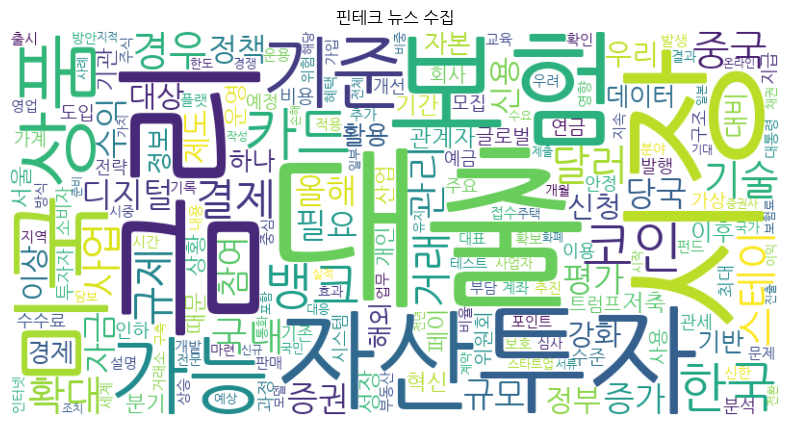

In [35]:
all_words = []
for doc in cleaned_docs:
    all_words.extend(doc)
    
word_freq = Counter(all_words)

wc = WordCloud(
        font_path='NanumGothic.ttf',
        background_color='white',
        width=800,
        height=400).generate_from_frequencies(word_freq)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("핀테크 뉴스 수집")
plt.show()

## LDA

In [42]:
from gensim.models import CoherenceModel
from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import LdaModel, CoherenceModel

In [37]:
# mecab 으로 명사만 추출해서 길이가 2 이상인 것만 모아서 리스트로 만드는 함수
def tokenize_texts(texts):
    return [[word for word in mecab.nouns(doc) if len(word) > 1] for doc in texts]

In [44]:
dictionary = corpora.Dictionary(cleaned_docs)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in cleaned_docs]

def find_best_lda(corpus, dictionary, texts, start=2, end=8, step=1):
    best_score = -1
    best_model = None
    best_k = start
    for k in range(start, end+1, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k,
                         random_state=42, passes=10, eval_every=None)
        
        cm = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        score = cm.get_coherence()
        print(f"k={k}, coherence={score:.4f}")
        if score > best_score:
            best_score, best_model, best_k = score, model, k
    print(f"Best k={best_k}, score={best_score:.4f}")
    return best_model, best_k

lda_model, best_k = find_best_lda(corpus, dictionary, cleaned_docs, start=2, end=8)

k=2, coherence=0.3705
k=3, coherence=0.4347
k=4, coherence=0.4932
k=5, coherence=0.5542
k=6, coherence=0.5829
k=7, coherence=0.5962
k=8, coherence=0.5815
Best k=7, score=0.5962


In [47]:
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.057*"보험" + 0.020*"상품" + 0.019*"연금" + 0.011*"투자" + 0.010*"퇴직" + 0.010*"수익" + 0.009*"판매" + 0.009*"가입" + 0.009*"보험료" + 0.008*"손해"
Topic 1: 0.025*"신청" + 0.022*"모집" + 0.018*"참여" + 0.016*"접수" + 0.015*"한국" + 0.013*"테스트" + 0.013*"사업" + 0.012*"작성" + 0.012*"대상" + 0.012*"교육"
Topic 2: 0.032*"미국" + 0.021*"중국" + 0.018*"달러" + 0.013*"트럼프" + 0.012*"시장" + 0.011*"경제" + 0.009*"관세" + 0.008*"정책" + 0.007*"대통령" + 0.007*"정부"
Topic 3: 0.017*"기술" + 0.016*"데이터" + 0.010*"디지털" + 0.010*"정보" + 0.010*"혁신" + 0.008*"투자" + 0.008*"활용" + 0.008*"기반" + 0.007*"사업" + 0.007*"개발"
Topic 4: 0.038*"카드" + 0.029*"결제" + 0.024*"페이" + 0.016*"뱅크" + 0.011*"사용" + 0.010*"수수료" + 0.009*"이용" + 0.008*"계좌" + 0.008*"혜택" + 0.008*"출시"
Topic 5: 0.046*"대출" + 0.039*"금리" + 0.013*"기준" + 0.011*"저축" + 0.010*"가계" + 0.010*"신용" + 0.010*"인하" + 0.009*"증가" + 0.009*"뱅크" + 0.008*"분기"
Topic 6: 0.018*"자산" + 0.016*"시장" + 0.012*"코인" + 0.011*"거래" + 0.011*"투자" + 0.010*"스테이" + 0.010*"증권" + 0.010*"가상" + 0.007*"투자자" + 0.007*"규제"


In [49]:
from sklearn.manifold import TSNE

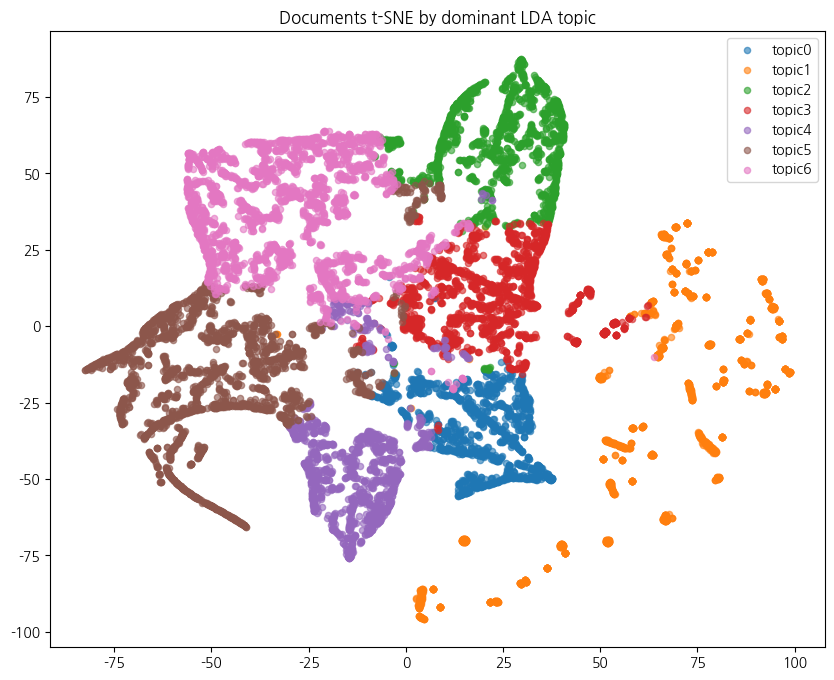

In [51]:
doc_topics = []
for bow in corpus:
    topic_dist = lda_model.get_document_topics(bow, minimum_probability=0)
    topic_vec = [prob for _, prob in sorted(topic_dist, key=lambda x:x[0])]
    doc_topics.append(topic_vec)
doc_topics = np.array(doc_topics)  # shape = (n_docs, n_topics)

# t-SNE로 차원 축소
tsne = TSNE(n_components=2, random_state=42, perplexity=40, max_iter=1000)
doc_tsne = tsne.fit_transform(doc_topics)

# dominant topic
dominant_topic = np.argmax(doc_topics, axis=1)

plt.figure(figsize=(10,8))
palette = plt.get_cmap('tab10')
for t in range(doc_topics.shape[1]):
    idxs = np.where(dominant_topic == t)[0]
    plt.scatter(doc_tsne[idxs,0], doc_tsne[idxs,1], c=[palette(t)], label=f"topic{t}", alpha=0.6, s=20)
plt.legend()
plt.title("Documents t-SNE by dominant LDA topic")
plt.show()

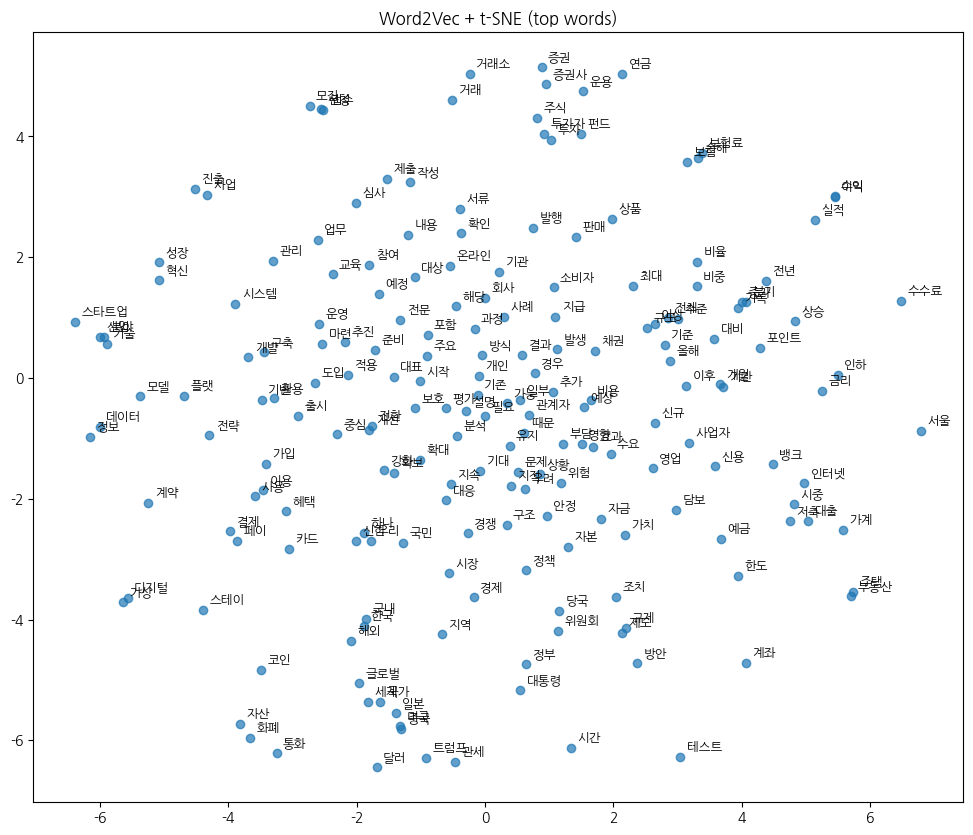

In [56]:
from gensim.models import Word2Vec

# 학습 (작은 데이터면 size=100 정도)
w2v = Word2Vec(sentences=cleaned_docs, vector_size=100, window=5, min_count=5, workers=4, epochs=10)

# 시각화할 단어 선택 (예: top N by frequency)
all_words = [w for doc in cleaned_docs for w in doc]
topN = [w for w,_ in Counter(all_words).most_common(200) if w in w2v.wv]
embs = np.array([w2v.wv[w] for w in topN])

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
emb2 = tsne.fit_transform(embs)

plt.figure(figsize=(12,10))
plt.scatter(emb2[:,0], emb2[:,1], alpha=0.7)
for i, w in enumerate(topN):
    plt.text(emb2[i,0]+0.1, emb2[i,1]+0.1, w, fontsize=9)
plt.title("Word2Vec + t-SNE (top words)")
plt.show()

In [57]:
save_dir = "./emb_projector"
import os
os.makedirs(save_dir, exist_ok=True)

# embeddings + metadata for topN
with open(os.path.join(save_dir, "embeddings.tsv"), "w", encoding="utf-8") as ef, \
     open(os.path.join(save_dir, "metadata.tsv"), "w", encoding="utf-8") as mf:
    for w in topN:
        vec = w2v.wv[w]
        ef.write("\t".join(map(str, vec)) + "\n")
        mf.write(w + "\n")

In [58]:
#tensorboard 매직 명령어
%load_ext tensorboard

#각 은행의 로그 디렉토리 지정해서 실행
%tensorboard --logdir ./logs/embedding_hana_neg